In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from google.colab import files

In [2]:
uploaded = files.upload()

Saving delhi_electricity_demapnd.csv to delhi_electricity_demapnd.csv


In [3]:
data = pd.read_csv('delhi_electricity_demapnd.csv')

In [4]:
data.shape

(43848, 9)

In [5]:
data.head(-10)

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
43833,31-Dec-24,9.0,1.0,12.0,2024.0,366.0,16.896276,72.380193,4631.349328
43834,31-Dec-24,10.0,1.0,12.0,2024.0,366.0,21.984042,77.277297,4813.689951
43835,31-Dec-24,11.0,1.0,12.0,2024.0,366.0,20.659219,69.227552,4582.446197
43836,31-Dec-24,12.0,1.0,12.0,2024.0,366.0,19.112534,52.688919,4544.418380


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    43848 non-null  object 
 1   hour         43837 non-null  float64
 2   dayofweek    43839 non-null  float64
 3   month        43840 non-null  float64
 4   year         43843 non-null  float64
 5   dayofyear    43843 non-null  float64
 6   Temperature  43841 non-null  float64
 7   Humidity     43838 non-null  float64
 8   Demand       43841 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.0+ MB


the **Timestamp** column was initially a an object data type and below we are converting it to *datetime* format.

In [7]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    43848 non-null  datetime64[ns]
 1   hour         43837 non-null  float64       
 2   dayofweek    43839 non-null  float64       
 3   month        43840 non-null  float64       
 4   year         43843 non-null  float64       
 5   dayofyear    43843 non-null  float64       
 6   Temperature  43841 non-null  float64       
 7   Humidity     43838 non-null  float64       
 8   Demand       43841 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.0 MB


/tmp/ipython-input-7-3315307892.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'])


In [8]:
data = data.set_index('Timestamp')
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [9]:
data[['Temperature', 'Humidity', 'Demand']].describe()

,Temperature,Humidity,Demand
count,43841.000000,43838.000000,43841.000000
mean,25.067788,59.903007,5000.790976
std,12.821725,18.342604,1412.527409
min,3.000000,20.000000,1611.954020
25%,15.210186,46.241224,4015.668472
50%,25.003212,59.986720,5013.053367
75%,34.740971,73.796820,6000.803082
max,50.000000,95.000000,11910.705100


# Dealing with Missing Data

In [10]:
print(data.isnull().sum())

hour           11
dayofweek       9
month           8
year            5
dayofyear       5
Temperature     7
Humidity       10
Demand          7
dtype: int64


In [11]:
data[data.isna().any(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-04-30,NaN,3.0,4.0,2020.0,121.0,21.820261,41.353675,5393.127681
2020-07-21,NaN,1.0,7.0,2020.0,203.0,36.555833,62.779665,6248.349423
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-27,NaN,5.0,2.0,2021.0,58.0,24.001003,53.303268,4523.253789
2021-12-13,23.0,0.0,12.0,2021.0,NaN,3.000000,75.457130,3225.225822
2021-12-14,NaN,1.0,12.0,2021.0,348.0,5.061319,47.215825,2887.848612


In [12]:
data[data.isna().all(axis=1)]
##this shows the subset of the data where all the values in each of the columns are missing

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As there is no scope of trying to work our way around with the data where no entries are present, it would be a wise decision to drop these rows of data.

*Below we are dropping all the rows which had no data in them at all!*

In [13]:
data = data.dropna(how='all')
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


Now to fill in the remaining empty values we can use bfill and ffill

In [14]:
data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']] = data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']].ffill()

/tmp/ipython-input-14-3402763247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']] = data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']].ffill()


In [15]:
data[['Temperature','Humidity']] = data[['Temperature','Humidity']].bfill()

/tmp/ipython-input-15-2229112482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Temperature','Humidity']] = data[['Temperature','Humidity']].bfill()


In [16]:
data['Demand'] = data['Demand'].interpolate(method='time')

/tmp/ipython-input-16-3652729601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Demand'] = data['Demand'].interpolate(method='time')


In [17]:
data.isnull().sum()

,0
hour,0
dayofweek,0
month,0
year,0
dayofyear,0
Temperature,0
Humidity,0
Demand,0


# Feature Engineering

In [18]:
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [19]:
data.insert(5, 'quarter', data.index.quarter)
data

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,1,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,1,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,1,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,1,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,4,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,4,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,4,3.000000,40.565916,4015.979957


In [20]:
data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']] = data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']].astype(int)

/tmp/ipython-input-20-3222519661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']] = data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']].astype(int)


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43844 entries, 2020-01-01 to 2024-12-31
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         43844 non-null  int64  
 1   dayofweek    43844 non-null  int64  
 2   month        43844 non-null  int64  
 3   year         43844 non-null  int64  
 4   dayofyear    43844 non-null  int64  
 5   quarter      43844 non-null  int32  
 6   Temperature  43844 non-null  float64
 7   Humidity     43844 non-null  float64
 8   Demand       43844 non-null  float64
dtypes: float64(3), int32(1), int64(5)
memory usage: 3.2 MB


In [22]:
data.insert(5, 'weekofyear', data.index.isocalendar().week.astype(int))

In [23]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,1,4,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,1,4,3.000000,40.565916,4015.979957


In [24]:
data.insert(7, 'is_weekend' , data.index.dayofweek.isin([5,6]).astype(int))

In [25]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957


Also we will check if there was any public holiday during the timestamp of the dataset

In [26]:
import holidays

In [27]:
data['holidays'] = holidays.IN(years = data.year)

/tmp/ipython-input-27-2470672226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['holidays'] = holidays.IN(years = data.year)


In [28]:
data.holidays.value_counts()

,count
holidays,
Republic Day,120
Maha Shivaratri,120
Mahavir Jayanti,120
Good Friday,120
Buddha Purnima,120
Eid al-Fitr,120
Eid al-Adha,120
Janmashtami,120
Independence Day,120


In [29]:
data = data.drop(columns = ['holidays'])

In [30]:
data['Demand_lag_24hr'] = data['Demand'].shift(24)

In [31]:
data['Demand_lag_week168hr'] = data['Demand'].shift(168)

### Rolling Meand and Rolling Standard Deviation

In [32]:
data['Demand_rolling_mean_24hr'] = data['Demand'].rolling(window=24).mean()

In [33]:
data['Demand_rolling_std_24hr'] = data['Demand'].rolling(window=24).std()

In [34]:
data.head(30)

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hr,Demand_lag_week168hr,Demand_rolling_mean_24hr,Demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,NaN,NaN,NaN,NaN
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,NaN,NaN,NaN,NaN
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,NaN,NaN,NaN,NaN
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,NaN,NaN,NaN,NaN
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,NaN,NaN,NaN,NaN
2020-01-01,5,2,1,2020,1,1,1,0,10.822571,67.753433,3104.845505,NaN,NaN,NaN,NaN
2020-01-01,6,2,1,2020,1,1,1,0,6.306673,94.912591,3759.476912,NaN,NaN,NaN,NaN
2020-01-01,7,2,1,2020,1,1,1,0,7.464640,74.456860,4114.486001,NaN,NaN,NaN,NaN
2020-01-01,8,2,1,2020,1,1,1,0,14.746876,66.725005,4575.159503,NaN,NaN,NaN,NaN


In [35]:
##now dropping all the rows will null entries
data = data.dropna()

In [36]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hr,Demand_lag_week168hr,Demand_rolling_mean_24hr,Demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2282.558766,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2193.324174,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2208.724679,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2402.611018,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,3859.260701,3856.359014,4052.475170,977.565114


# Visualization

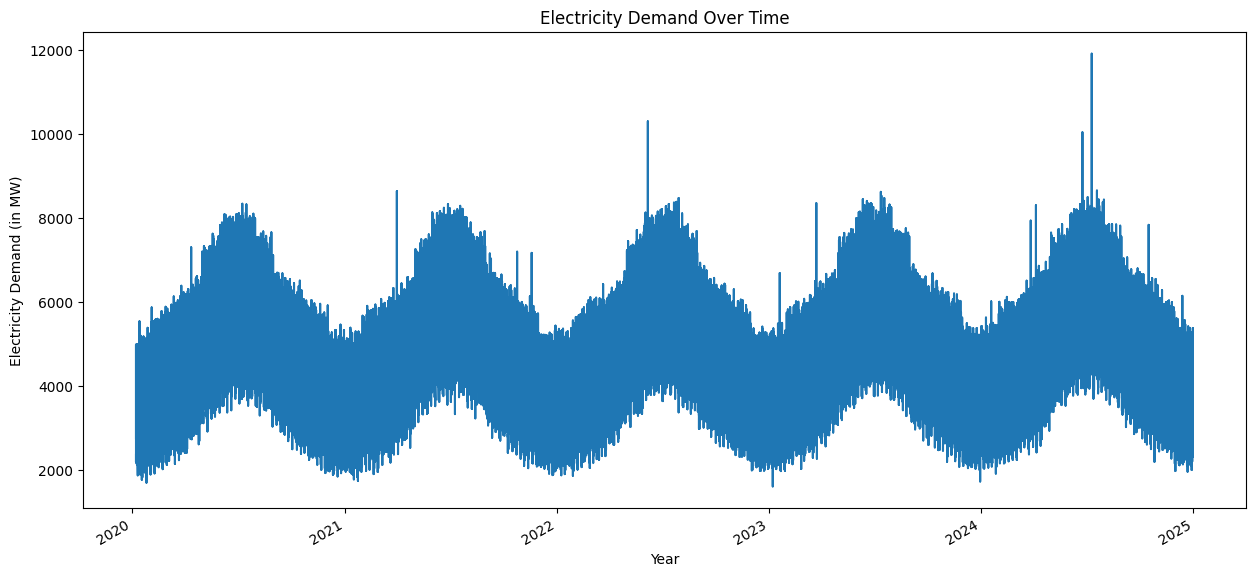

In [37]:
data['Demand'].plot(title = 'Electricity Demand Over Time', figsize = (15,7))
plt.xlabel('Year')
plt.ylabel('Electricity Demand (in MW)')
plt.show()

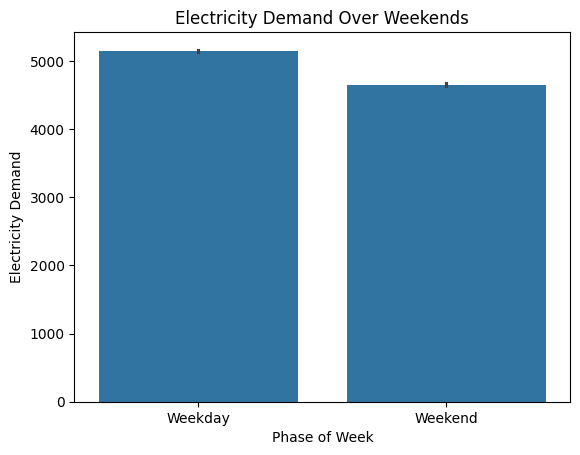

In [38]:
sns.barplot(x=data.is_weekend, y=data.Demand)
plt.title('Electricity Demand Over Weekends')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.xlabel('Phase of Week')
plt.ylabel('Electricity Demand')
plt.show()

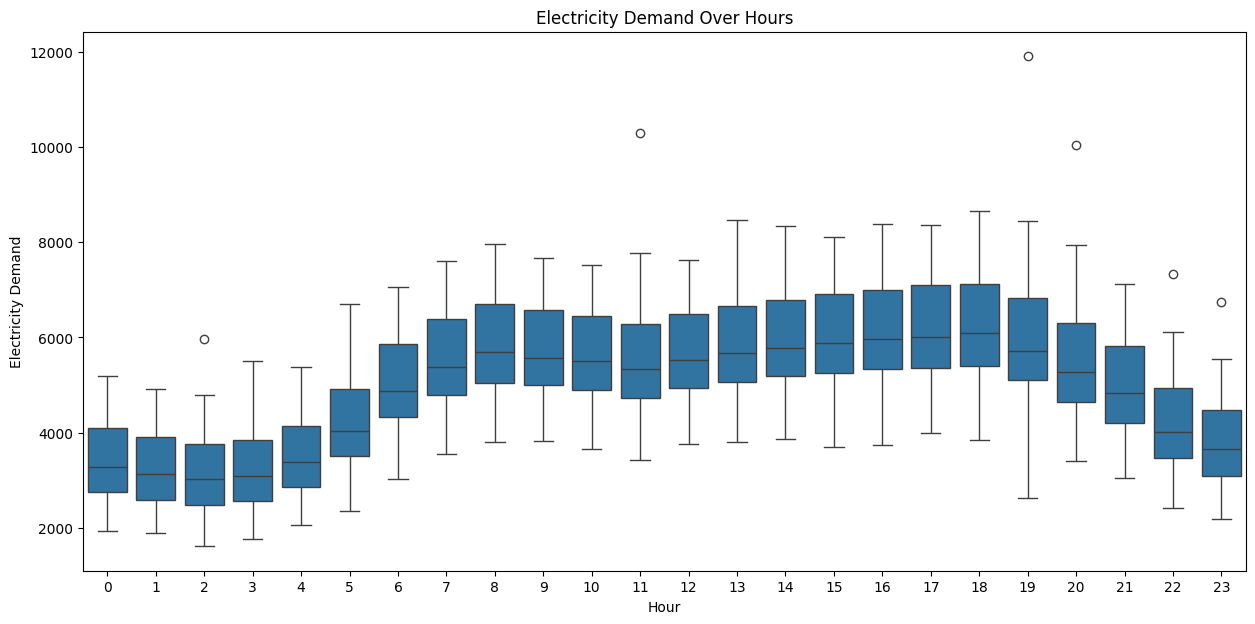

In [39]:
plt.figure(figsize=(15,7))
sns.boxplot(x=data.hour, y=data.Demand)
plt.title('Electricity Demand Over Hours')
plt.xlabel('Hour')
plt.ylabel('Electricity Demand')
plt.show()

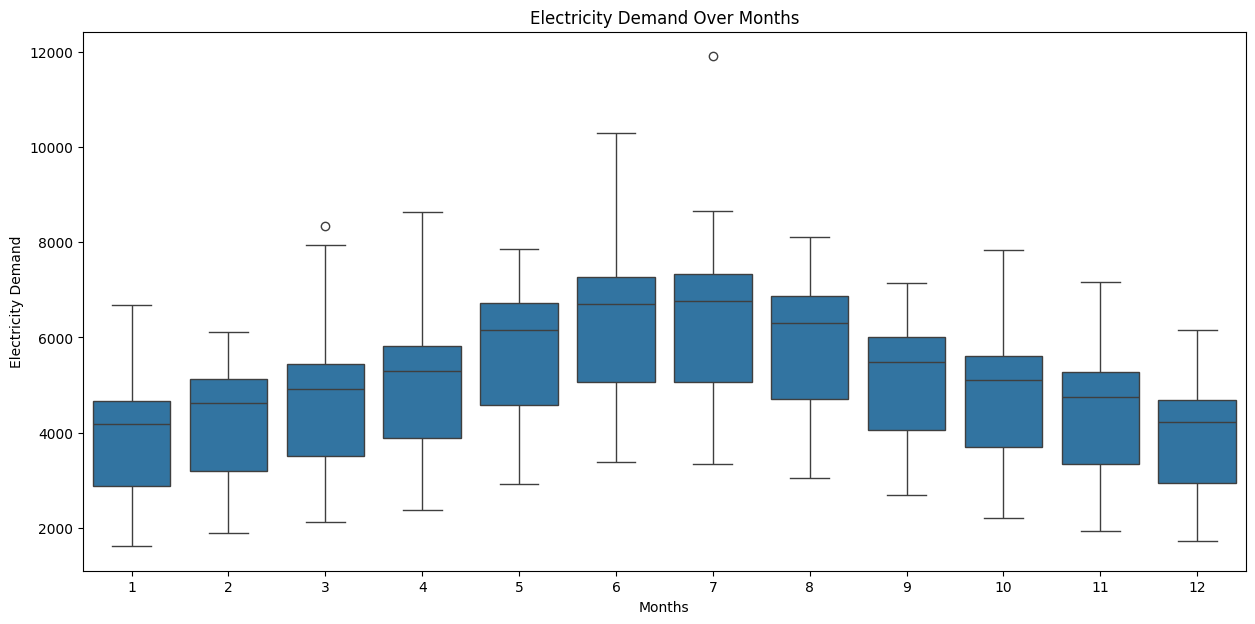

In [40]:
plt.figure(figsize=(15,7))
sns.boxplot(x=data.month, y=data.Demand)
plt.title('Electricity Demand Over Months')
plt.xlabel('Months')
plt.ylabel('Electricity Demand')
plt.show()

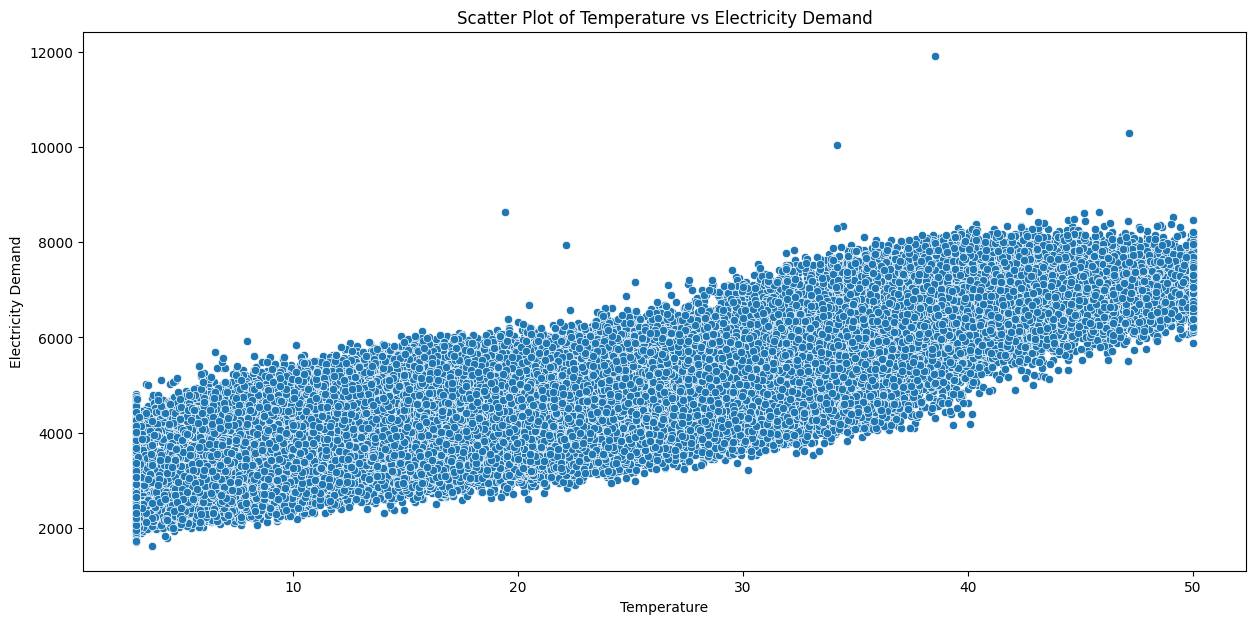

In [41]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=data.Temperature, y=data.Demand)
plt.title('Scatter Plot of Temperature vs Electricity Demand')
plt.xlabel('Temperature')
plt.ylabel('Electricity Demand')
plt.show()

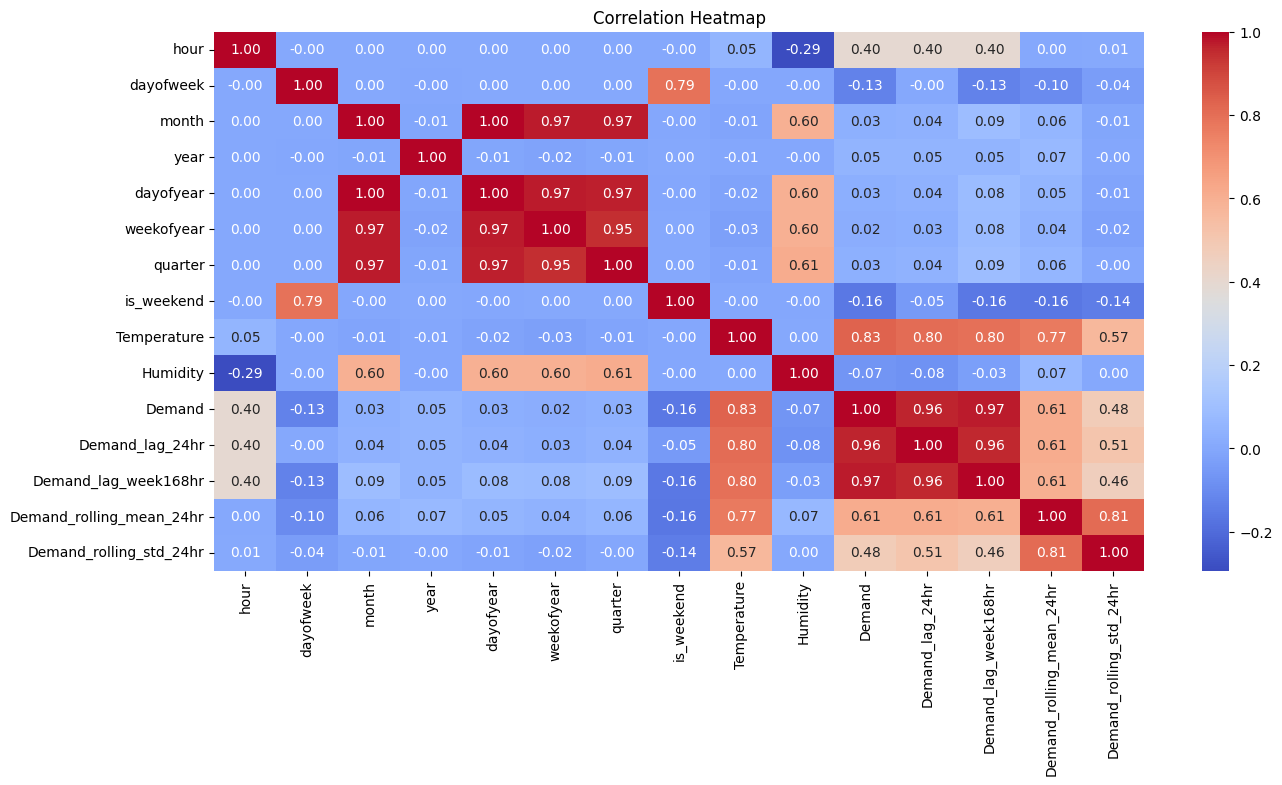

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Correlation heatmaps shows how one column's values change w.r.t other column according to their correlation points (CP).

- when CP = 1, it means to columns are directly correlated
- when CP = -1, it means to columns are inversely correlated

# Model Building

In [43]:
# assigning dependen variable
y = data.Demand

In [47]:
# dependent variables consists of all the columns(parameters) except the Demand
x = data.drop(columns = ['Demand'], axis=1)

In [48]:
y

,Demand
Timestamp,
2020-01-08,2363.060115
2020-01-08,2282.558766
2020-01-08,2193.324174
2020-01-08,2208.724679
2020-01-08,2402.611018
...,...
2024-12-31,4689.693109
2024-12-31,4331.249224
2024-12-31,4015.979957


In [49]:
x

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand_lag_24hr,Demand_lag_week168hr,Demand_rolling_mean_24hr,Demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,3859.260701,3856.359014,4052.475170,977.565114


Splitting the data into 80 - 20 for training and testing

In [50]:
x_train = x.loc[:'2023-12-31']

In [52]:
y_train = y.loc[:'2023-12-31']

In [53]:
x_test = x.loc['2024-01-01':]

In [55]:
y_test = y.loc['2024-01-01':]

## XGBoost Model
As it can handle non-linear data easily for timeseries forcasting

In [56]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit

Training the model

In [57]:
model_xgb = XGBRegressor(n_estimators=1000,
                         learning_rate=0.01,
                         early_stopping_rounds=50,
                         random_state=42,
                         objective='reg:squarederror')

In short:

The XGBRegressor initialization creates a model that will train for up to 1000 boosting rounds (trees) but will stop early if performance on a validation set
doesn't improve for 50 consecutive rounds.

Each tree's contribution is scaled down by a learning rate of 0.01 to prevent overfitting.

This model is designed to minimize the squared error for regression tasks.

In [58]:
model_xgb.fit(x_train, y_train, eval_set=[(x_test, y_test)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [59]:
# making predictions
y_pred = model_xgb.predict(x_test)

In [60]:
# evaluating its findings
root_mse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

In [61]:
print("Root Mean Squared Error:", root_mse)
print("Mean Absolute Error:", mae)

Root Mean Squared Error: 175.22716387271916
Mean Absolute Error: 123.47612356015286


### Visualising the Model Predictions

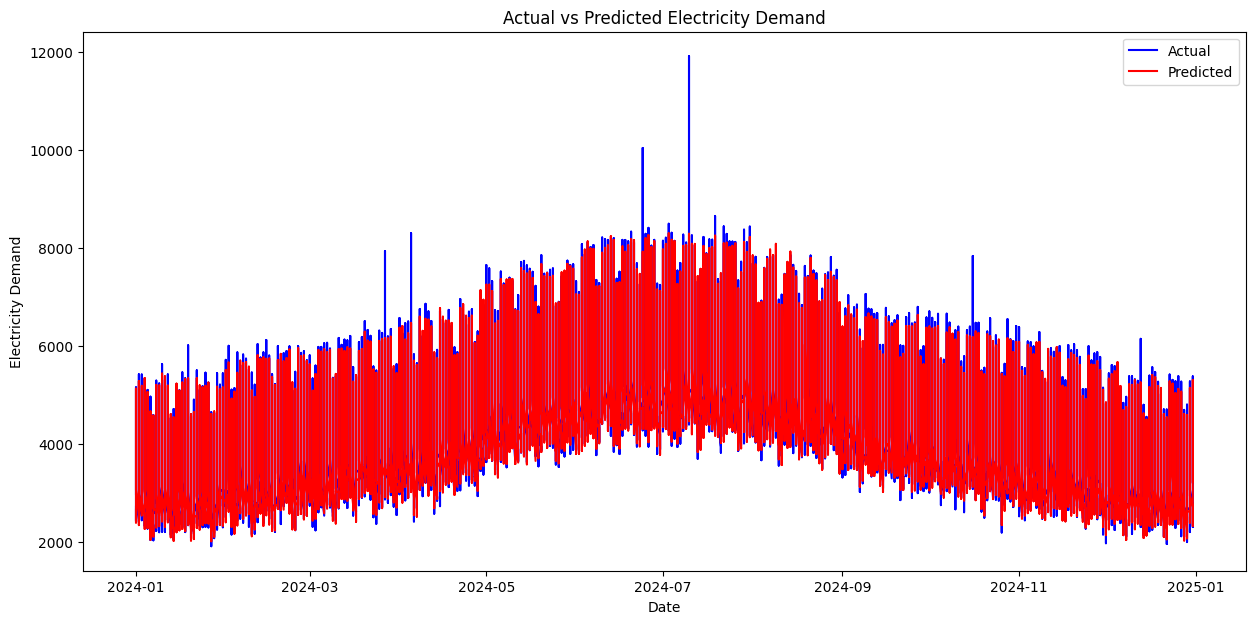

In [64]:
plt.figure(figsize=(15,7))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Electricity Demand')
plt.xlabel('Date')
plt.ylabel('Electricity Demand')
plt.legend()
plt.show()

In [65]:
# saving the model
import joblib
joblib.dump(model_xgb, 'xgb_model.pkl')

['xgb_model.pkl']

In [66]:
files.download('xgb_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We can use this .pkl file to instantiatate the model we just created.

In [67]:
# to load the pkl file
model_new = joblib.load('xgb_model.pkl')

In [68]:
# verify the model
model_new

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)